# Breast Cancer Analysis

####  Members
Alan Lee, Lavender Yu, Clare Pan, Frederick Wang
## 1 Introduction
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases and has affected over 2.26 million people in 2020 (Wilkinson, Louise. 2021). Therefore, finding physiological markers could help in the early detection of breast cancer.

Using the Breast Cancer Coimbra dataset, this project will determine if there are statistically significant differences in the median of insulin and MCP-1 between breast cancer patients and healthy controls. The median is preferable to the mean because, as seen in Figures 2.1 and 2.2, both distributions of variables are right-skewed. Research suggests insulin is an important growth factor for cancer-promoting features (Shu X, et al., 2019) and higher insulin levels accompany those at risk of breast cancer (Borgquist S, et al. 2017). In addition, MCP-1, a protein that recruits monocytes circulating the body, may be a possible predictor of breast cancer (Pham H, Pham D, 2019).

The data was gathered at the University Hospital Centre of Coimbra. It contains 52 healthy controls and 64 breast cancer patients. The dataset consists of the following variables: `Age` (years), `BMI` (kg/$m^2$
), `Glucose` (mg/dL), `Insulin` (μlU/mL), `HOMA`(Homeostatic Model Assessment), `Leptin` (ng/mL), `Adiponectin` (μg/mL), `Resistin` (ng/mL), `MCP-1` (pg/dL), and `Classification` (1 = Healthy controls, 2 = Patients).

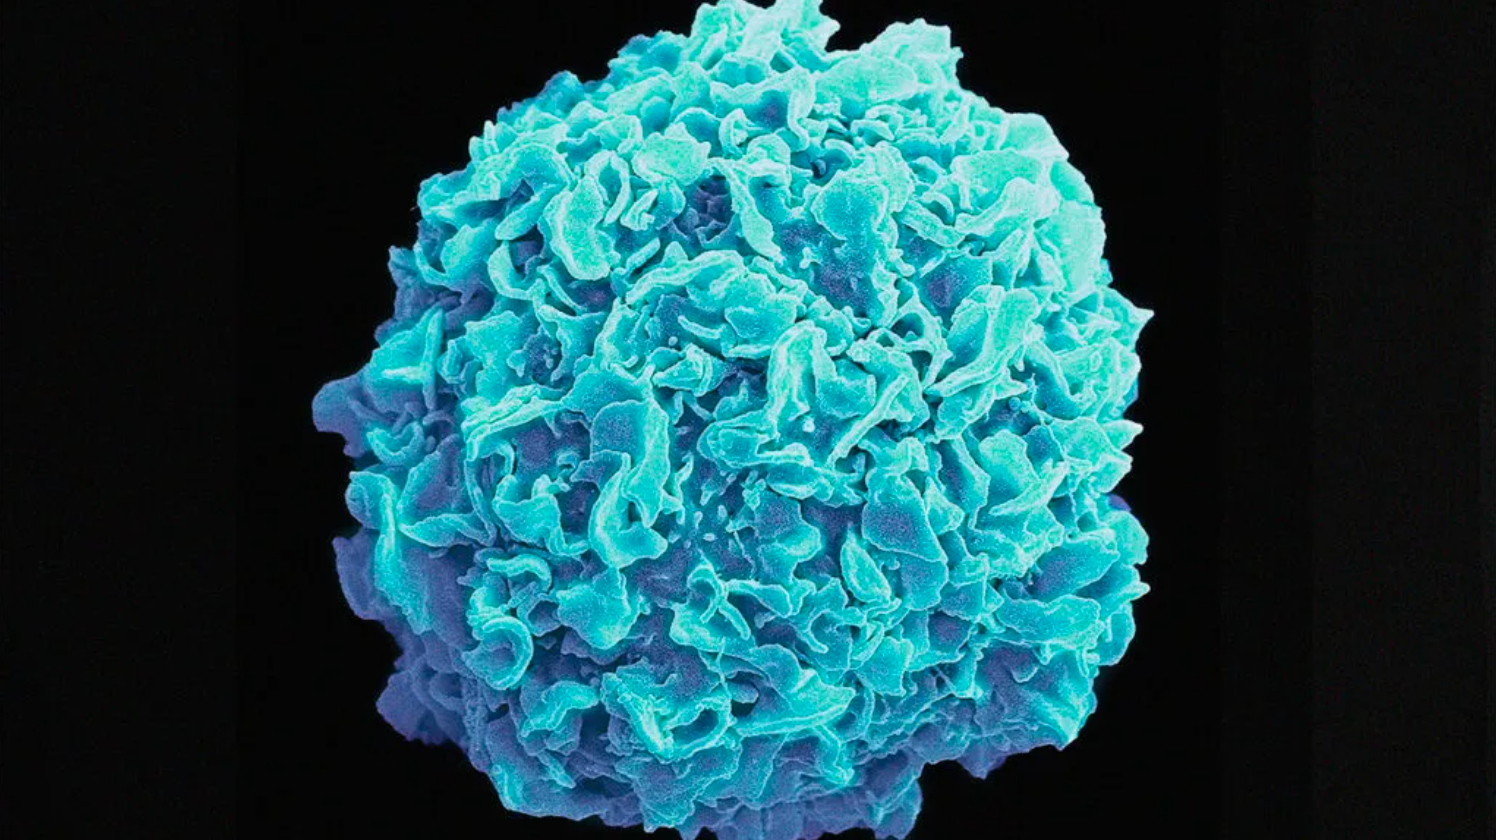



Colored scanning electron micrograph of breast cancer cells. STEVE GSCHMEISSNER/SCIENCE PHOTO LIBRARY/Getty Images

## 2 Preliminary Results

In [28]:
# import library
library(tidyverse)
library(cowplot)
library(infer)

options(repr.plot.width = 20, repr.plot.height = 10)

### 2.1 Reading the Dataset from the Web

In [29]:
cancer <- read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')

Rows: 116 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, M...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [30]:
head(cancer)

Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
48,23.50000,70,2.707,0.4674087,8.8071,9.702400,7.99585,417.114,1
83,20.69049,92,3.115,0.7068973,8.8438,5.429285,4.06405,468.786,1
82,23.12467,91,4.498,1.0096511,17.9393,22.432040,9.27715,554.697,1
68,21.36752,77,3.226,0.6127249,9.8827,7.169560,12.76600,928.220,1
86,21.11111,92,3.549,0.8053864,6.6994,4.819240,10.57635,773.920,1
49,22.85446,92,3.226,0.7320869,6.8317,13.679750,10.31760,530.410,1


**Table 2.1** Breast cancer dataset

### 2.2 Wrangling the Data
We are interested in comparing the insulin and MCP-1 levels of the healthy controls and the patients, so we split `cancer` into `control` (`Classification` == 1), and `patient` (`Classification` == 2), then select `Insulin`, and `MCP.1`.

In [31]:
control <- cancer %>%
    filter(Classification == 1) %>%
    select(Insulin, MCP.1)

patient <- cancer %>%
    filter(Classification == 2) %>%
    select(Insulin, MCP.1)

### 2.3 Explantory Data Analysis
We perform an explanatory data analysis on the datasets to investigate and to better understand the data.

In [32]:
control_summarize <- control %>%
    summarize(Insulin_min = min(Insulin),
              Insulin_max = max(Insulin),
              Insulin_mean = mean(Insulin),
              Insulin_median = median(Insulin),
              Insulin_sd = sd(Insulin),
              MCP.1_min = min(MCP.1),
              MCP.1_max = max(MCP.1),
              MCP.1_mean = mean(MCP.1),
              MCP.1_median = median(MCP.1),
              MCP.1_sd = sd(MCP.1))

In [33]:
control_summarize

Insulin_min,Insulin_max,Insulin_mean,Insulin_median,Insulin_sd,MCP.1_min,MCP.1_max,MCP.1_mean,MCP.1_median,MCP.1_sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.707,26.211,6.933769,5.4835,4.859793,45.843,1256.083,499.7307,471.3225,292.2422


**Table 2.2** Range, mean, median and standard deviation of `control` dataset

In [34]:
patient_summarize <- patient %>%
    summarize(Insulin_min = min(Insulin),
              Insulin_max = max(Insulin),
              Insulin_mean = mean(Insulin),
              Insulin_median = median(Insulin),
              Insulin_sd = sd(Insulin),
              MCP.1_min = min(MCP.1),
              MCP.1_max = max(MCP.1),
              MCP.1_mean = mean(MCP.1),
              MCP.1_median = median(MCP.1),
              MCP.1_sd = sd(MCP.1))

In [35]:
patient_summarize

Insulin_min,Insulin_max,Insulin_mean,Insulin_median,Insulin_sd,MCP.1_min,MCP.1_max,MCP.1_mean,MCP.1_median,MCP.1_sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.432,58.46,12.51322,7.58,12.31774,90.09,1698.44,563.0165,465.374,384.0016


**Table 2.3** Range, mean, median and standard deviation of `patient` dataset



|          | Minimum | Maximum |  Mean  |  Median  | Standard Deviation |
|:--------:|:-------:|:-------:|:------:|:--------:|:------------------:|
| Healthy Controls |  2.707  |  26.211 |  6.933769 |  5.4835 |        4.859793       |
|     Patients     |  2.432  |  58.46  | 12.51322 |  7.58  |       12.31774       |

**Table 2.4** Summary of insulin levels of healthy controls and patients



|          | Minimum | Maximum |  Mean  |  Median  | Standard Deviation |
|:--------:|:-------:|:-------:|:------:|:--------:|:------------------:|
| Healthy Controls |  45.843 | 1256.083 | 499.7307 | 471.3225 |       292.2422      |
|     Patients     |  90.09  |  1698.44 | 563.0165 | 465.374 |       384.0016      |

**Table 2.5** Summary of MCP-1 levels of healthy controls and patients

In [36]:
control_insulin_plot <- control %>%
    ggplot(aes(x = Insulin)) +
    geom_histogram(binwidth = 2) + 
    labs(x = "Insulin (Micro Units/mL)", title = 'Distribution of Healthy Control Insulin') +
    theme(text = element_text(size=20)) +
    xlim(0, 60)

patient_insulin_plot <- patient %>%
    ggplot(aes(x = Insulin)) +
    geom_histogram(binwidth = 2) + 
    labs(x = "Insulin (Micro Units/mL)", title = 'Distribution of Patient Insulin') +
    theme(text = element_text(size=20)) +
    xlim(0, 60)

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


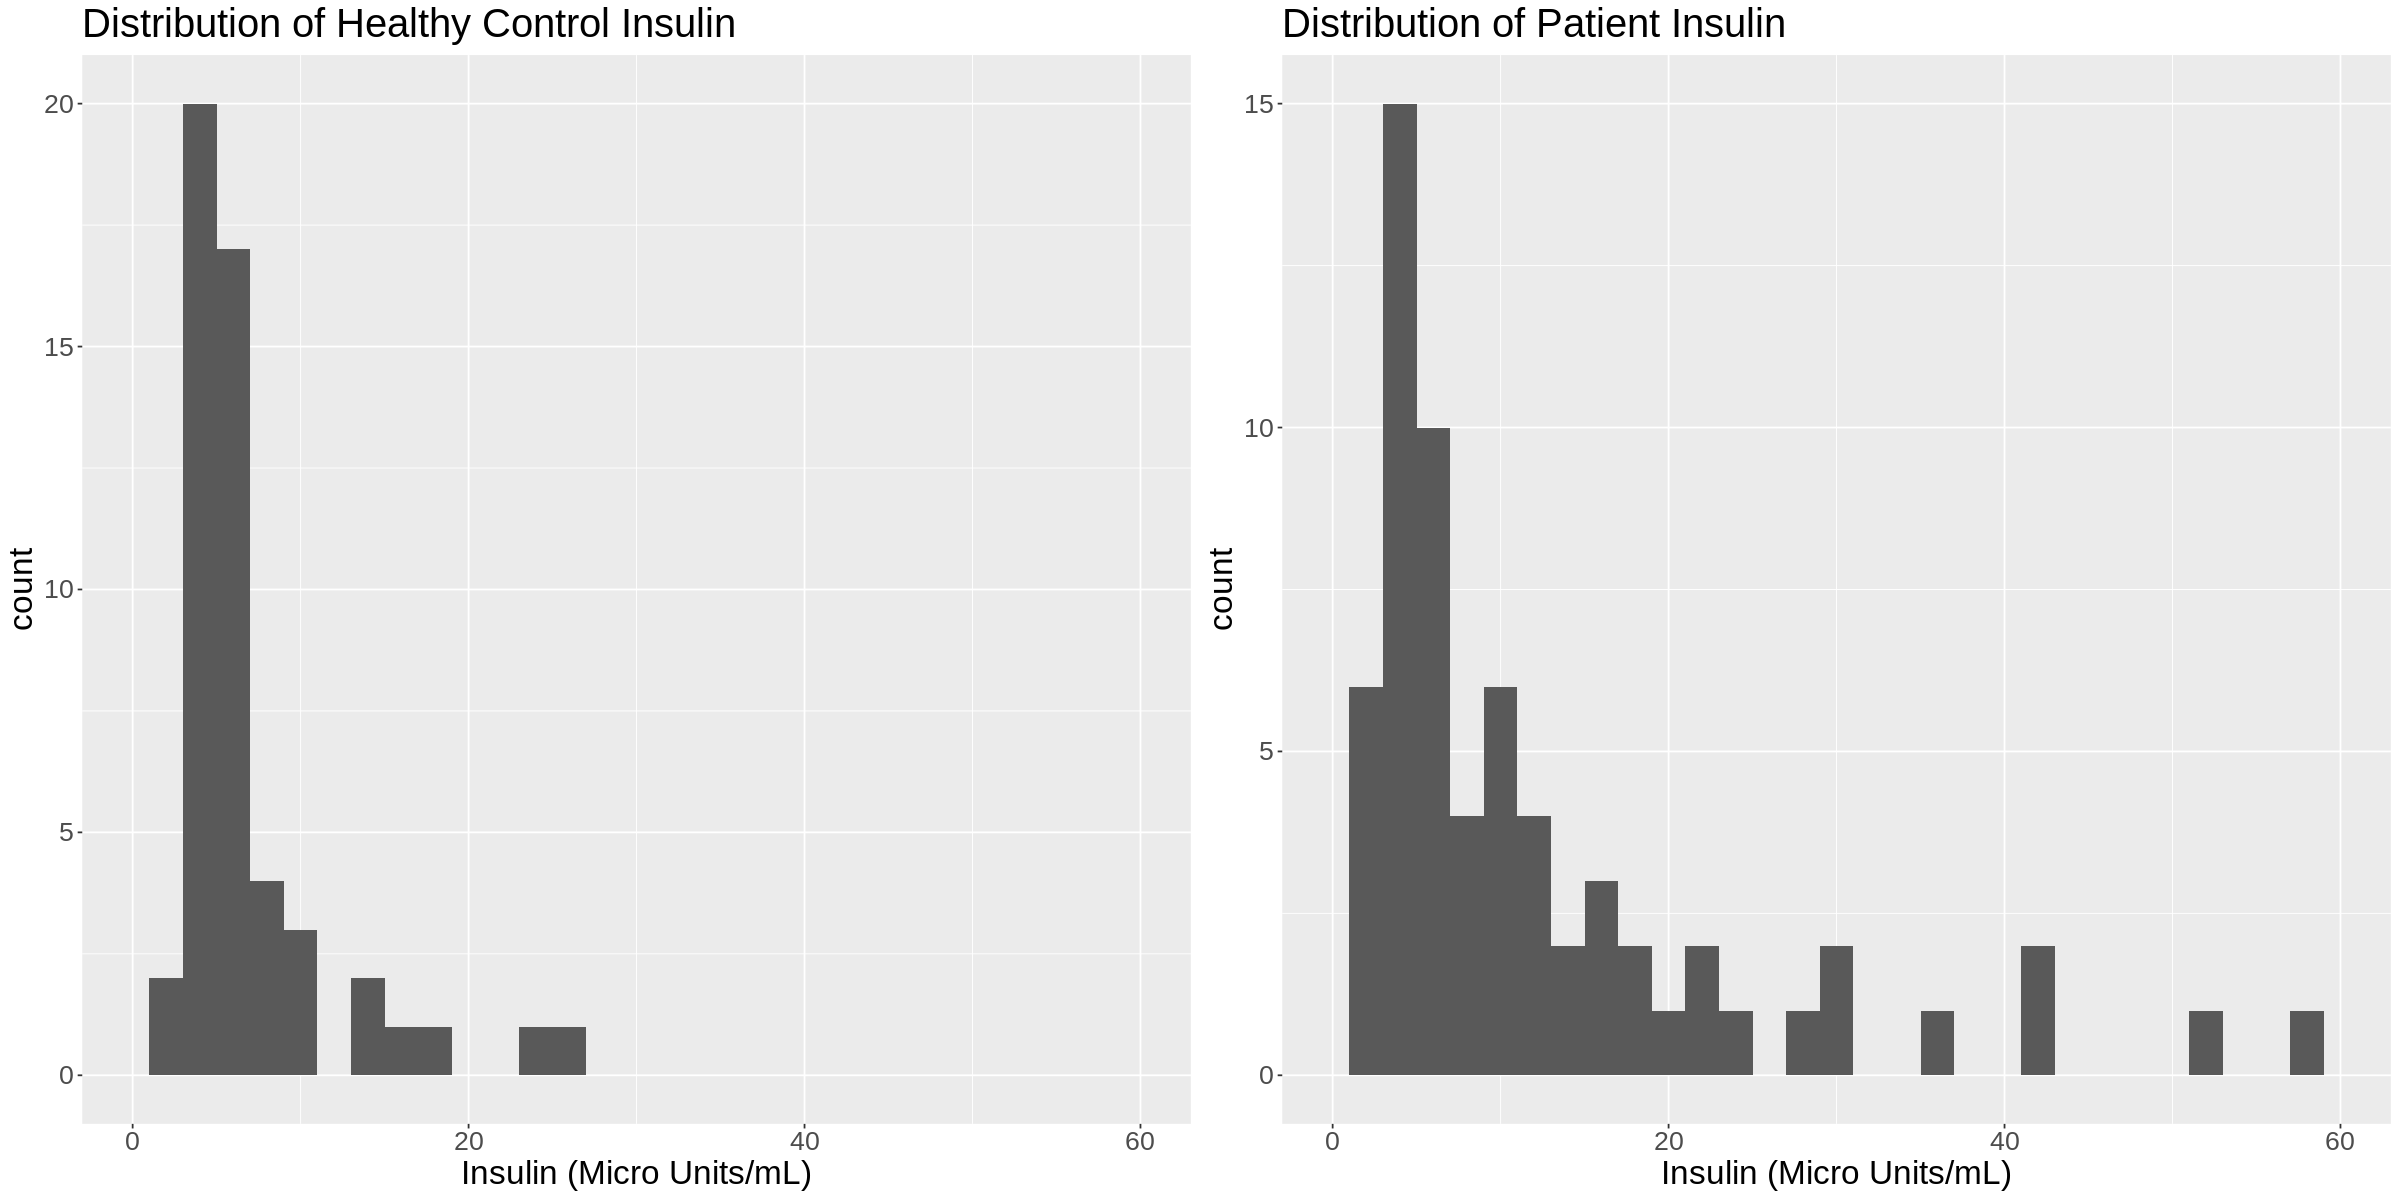

In [37]:
plot_grid(control_insulin_plot, patient_insulin_plot)

**Figure 2.1** Healthy controls v.s. patients with respect to insulin

In [38]:
control_mcp_plot <- control %>%
    ggplot(aes(x = MCP.1)) +
    geom_histogram(binwidth = 80) + 
    labs(x = "MCP-1 (pg/dL)", title = 'Distribution of Healthy Control MCP-1') +
    theme(text = element_text(size=20)) +
    xlim(0, 1750)

patient_mcp_plot <- patient %>%
    ggplot(aes(x = MCP.1)) +
    geom_histogram(binwidth = 80) + 
    labs(x = "MCP-1 (pg/dL)", title = 'Distribution of Patient MCP-1') +
    theme(text = element_text(size=20)) +
    xlim(0, 1750)

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


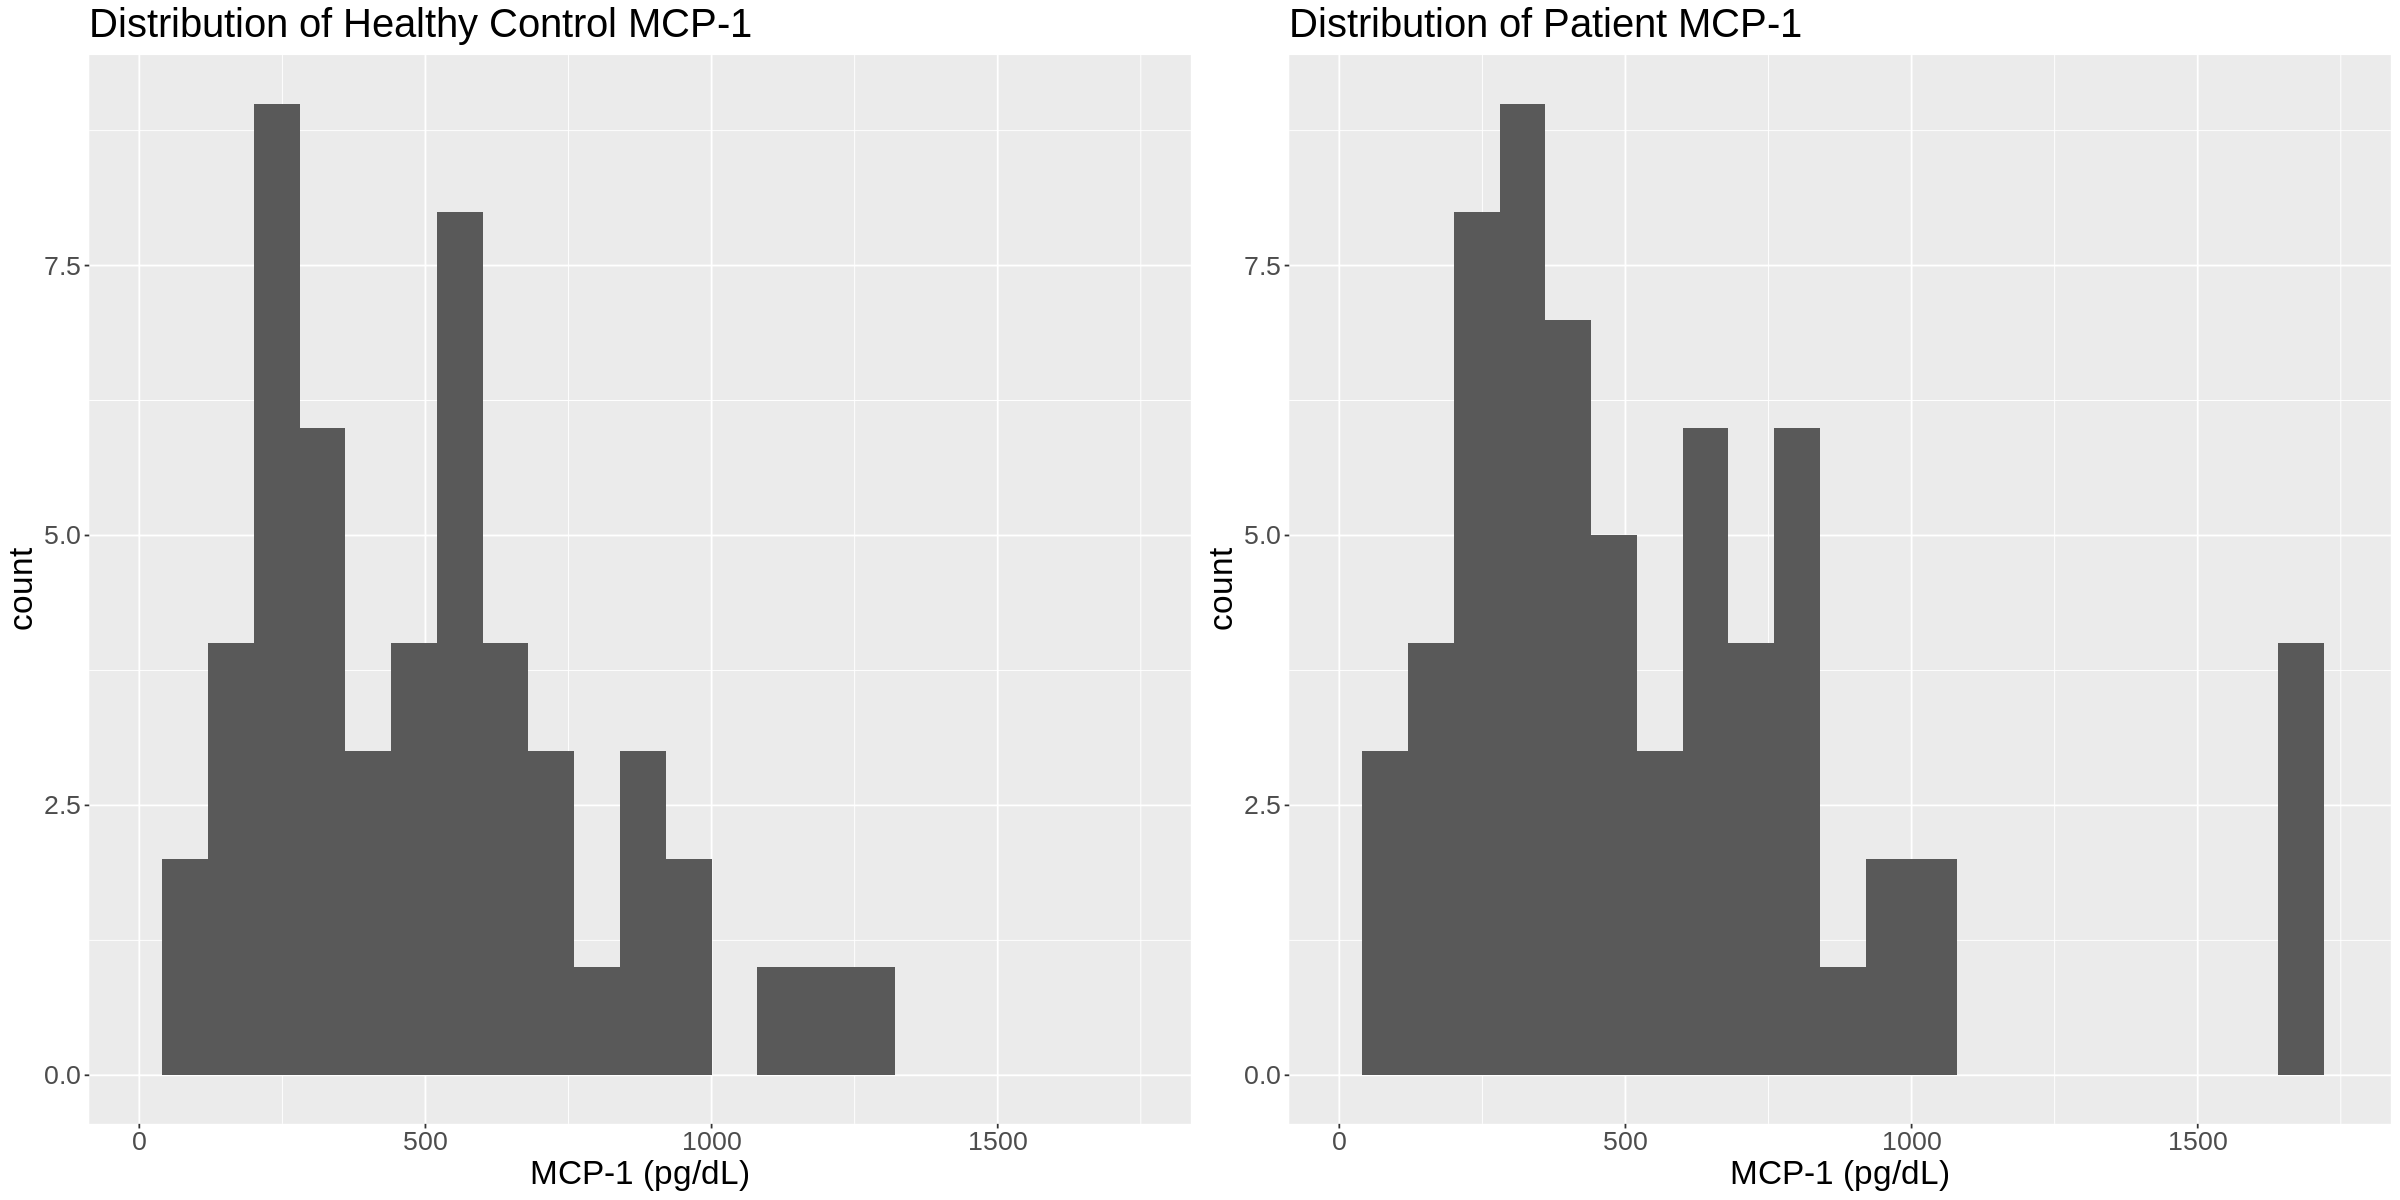

In [39]:
plot_grid(control_mcp_plot, patient_mcp_plot)

**Figure 2.2** Healthy controls v.s. patients with respect to MCP-1

## 3 Methods: Plan
This report will provide valuable insight into the relationship between the two clinical features of interest and their differences in healthy controls and breast cancer patients. The findings of this study will be generalizable to all women from Coimbra as the sample of healthy control volunteers and recruited cancer patients are representative of the population of healthy and cancer-afflicted women. 

Although the graphs and statistics in the preliminary results section show a difference in insulin and MCP-1 levels between healthy controls and patients, they are not sufficient to determine whether there is a significant enough difference to be used in the diagnosis process. Therefore, hypothesis testing for differences between means will be conducted on insulin and MCP-1 and confidence intervals will be constructed to determine a range of plausible differences. Variances and other scale parameters will be calculated to provide an idea of the range of values in insulin and MCP-1 levels in women. Since bootstrapping and the asymptotic method seem equally suitable for this study as the Central Limit Theorem requirements are all met, we will conduct tests using both methods in the report and compare their results. 

At the end of this study, we expect a significant difference in medians of insulin and MCP-1 levels between healthy controls and patients, as suggested by the figures and tables. If accurate, the findings from this report could be used as preliminary tests in the process of diagnosing Coibrian women. The two variables, insulin and MCP-1 are also commonly measured anthropometric data that are easily obtainable via routine blood tests, making the findings directly applicable to the average medical clinic. Going beyond this report, future studies could look into whether insulin and MCP-1 are good predictors of breast cancer in women worldwide, removing the bias that the lifestyle and culture of Coimbra may have on the results. Furthermore, studies could examine more general variables that, alone, could be used to diagnose breast cancer. 


## 4 References
- Borgquist, S., Rosendahl, A., Czene, K., Bhoo-Pathy, N., Dorkhan, M., Hall, P., & Brand, J. (2017). Insulin and breast cancer risk: Novel insights from mammographic density analyses. Paper presented at the 77. Retrieved from https://doi.org/10.1158/1538-7445.SABCS16-P2-07-03
- Pham, H., & Pham, D. H. (2020). A novel generalized logistic dependent model to predict the presence of breast cancer based on biomarkers. Concurrency and Computation, 32(1), n/a. Retrieved from  https://doi.org/10.1002/cpe.5467
- Shu, X., Wu, L., Khankari, N., Shu, X., Wang, T., Michailidou, K., van den Ouweland, A., Ziogas, A., Ziv, E., & Breast Cancer Association Consortium. (2019;2018;). Associations of obesity and circulating insulin and glucose with breast cancer risk: A mendelian randomization analysis. International Journal of Epidemiology, 48(3), 795-806. Retrieved from  https://doi.org/10.1093/ije/dyy201
 - Wilkinson, Louise. (14 December 2021). Understanding breast cancer as a global health concern.  NCBI. Retrieved from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8822551/. 
